In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

#importar pandas
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

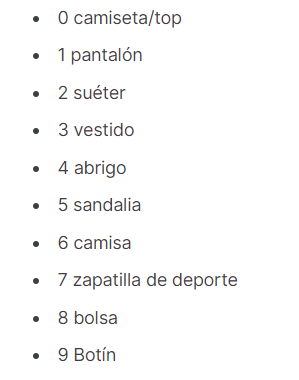

In [220]:
# Esto sugiere que las imágenes son de tamaño 28x28 píxeles, ya que 28 * 28 = 784
input_layer_size = 90000

# 9 clases
num_labels = 9

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regresiones/Practicando Regresiones/fashion-mnist_test.csv')

# Divide el conjunto de datos en características de entrada (X) y etiquetas (y)
X, y = data.drop(columns=['label']).values, data['label'].values

# Imprime las dimensiones de X y y
print(X.shape, y.shape)

# Cambia todas las etiquetas con valor 10 a 0
y[y == 10] = 0

# Almacena el número total de ejemplos de entrenamiento en la variable 'm'
m = y.size


(10000, 784) (10000,)


In [221]:
#cuantas columnas tiene
X.shape[1]

784

In [222]:
# Division de dataset en entrenamiento y prueba
#80% del total de los datos para entrenamiento y el 20% del total como datos de prueba

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [223]:
print(train_data)

      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
9254      8       0       0       0       0       0       0       0       0   
1561      5       0       0       0       0       0       0       0       0   
1670      4       0       0       0       0       0       0       0       2   
6087      3       0       0       0       0       0       0       0       0   
6669      2       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
5734      2       0       0       0       0       0       0       0       0   
5191      8       0       0       0       0       0       0       0       0   
5390      2       0       0       0       0       0       0       0       0   
860       9       0       0       0       0       0       0       0       0   
7270      7       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel775  pixel776  pixel777  pi

In [224]:
print(test_data)

      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
6252      4       0       0       0       0       0       0       0       0   
4684      9       0       0       0       0       0       0       0       0   
1731      6       0       0       0       0       0       0       0       0   
4742      0       0       0       0       1       1       0       0       0   
4521      9       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
6412      9       0       0       0       0       0       0       0       0   
8285      9       0       0       0       0       0       0       0       0   
7853      5       0       0       0       0       0       0       0       0   
1095      5       0       0       0       0       0       0       0       0   
6929      1       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel775  pixel776  pixel777  pi

In [225]:
#entrenamiento
#guardar el array de entrenamiento
np.savetxt("train.csv", train_data, delimiter=",")

In [226]:
#prueba
#guardar el array de prueba
np.savetxt("test.csv", train_data, delimiter=",")

In [227]:
# Cargar datos desde un archivo CSV a un array NumPy, omitiendo encabezados
data_np = np.loadtxt('/content/test.csv', delimiter=',', skiprows=1)
# Cargar nombres de columnas desde el mismo archivo CSV como cadenas de texto
column_names = np.genfromtxt('/content/test.csv', delimiter=',', max_rows=1, dtype=str)
# Crear un DataFrame de Pandas 'data' con el array NumPy y nombres de columnas
data = pd.DataFrame(data_np, columns=column_names)
# Convertir el array NumPy 'data_np' y nombres de columnas en un DataFrame de Pandas 'data'.
# Etiquetar cada columna con los nombres de columnas obtenidos anteriormente.
# Esto facilita manipulación de datos .



In [228]:
def displayData(X, example_width=None, figsize=(28, 28)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """

    # Verificar si la matriz X es bidimensional
    if X.ndim == 2:
      # Obtener las dimensiones de la matriz X
        m, n = X.shape
    # Verificar si la matriz X es un vector (unidimensional)
    elif X.ndim == 1:
        # Si X es un vector, asigna el tamaño de X a n y establece m en 1
        n = X.size
        # Establecer m en 1, ya que es un vector
        m = 1
        # se utiliza para transformar un vector unidimensional (X) en una matriz bidimensional.
        X = X[None]
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensional.')

    # Si example_ancho no está especificado, se calcula como la raíz cuadrada de n
    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el número de filas y columnas para mostrar los elementos en una cuadrícula
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    # Crea una figura y un conjunto de subgráficos
    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)
    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    # Itera sobre los subgráficos y muestra cada elemento de X
    for i, ax in enumerate(ax_array):
        # Muestra cada elemento de X como una imagen en escala de grises
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        # Desactiva la visualización de los ejes
        ax.axis('off')


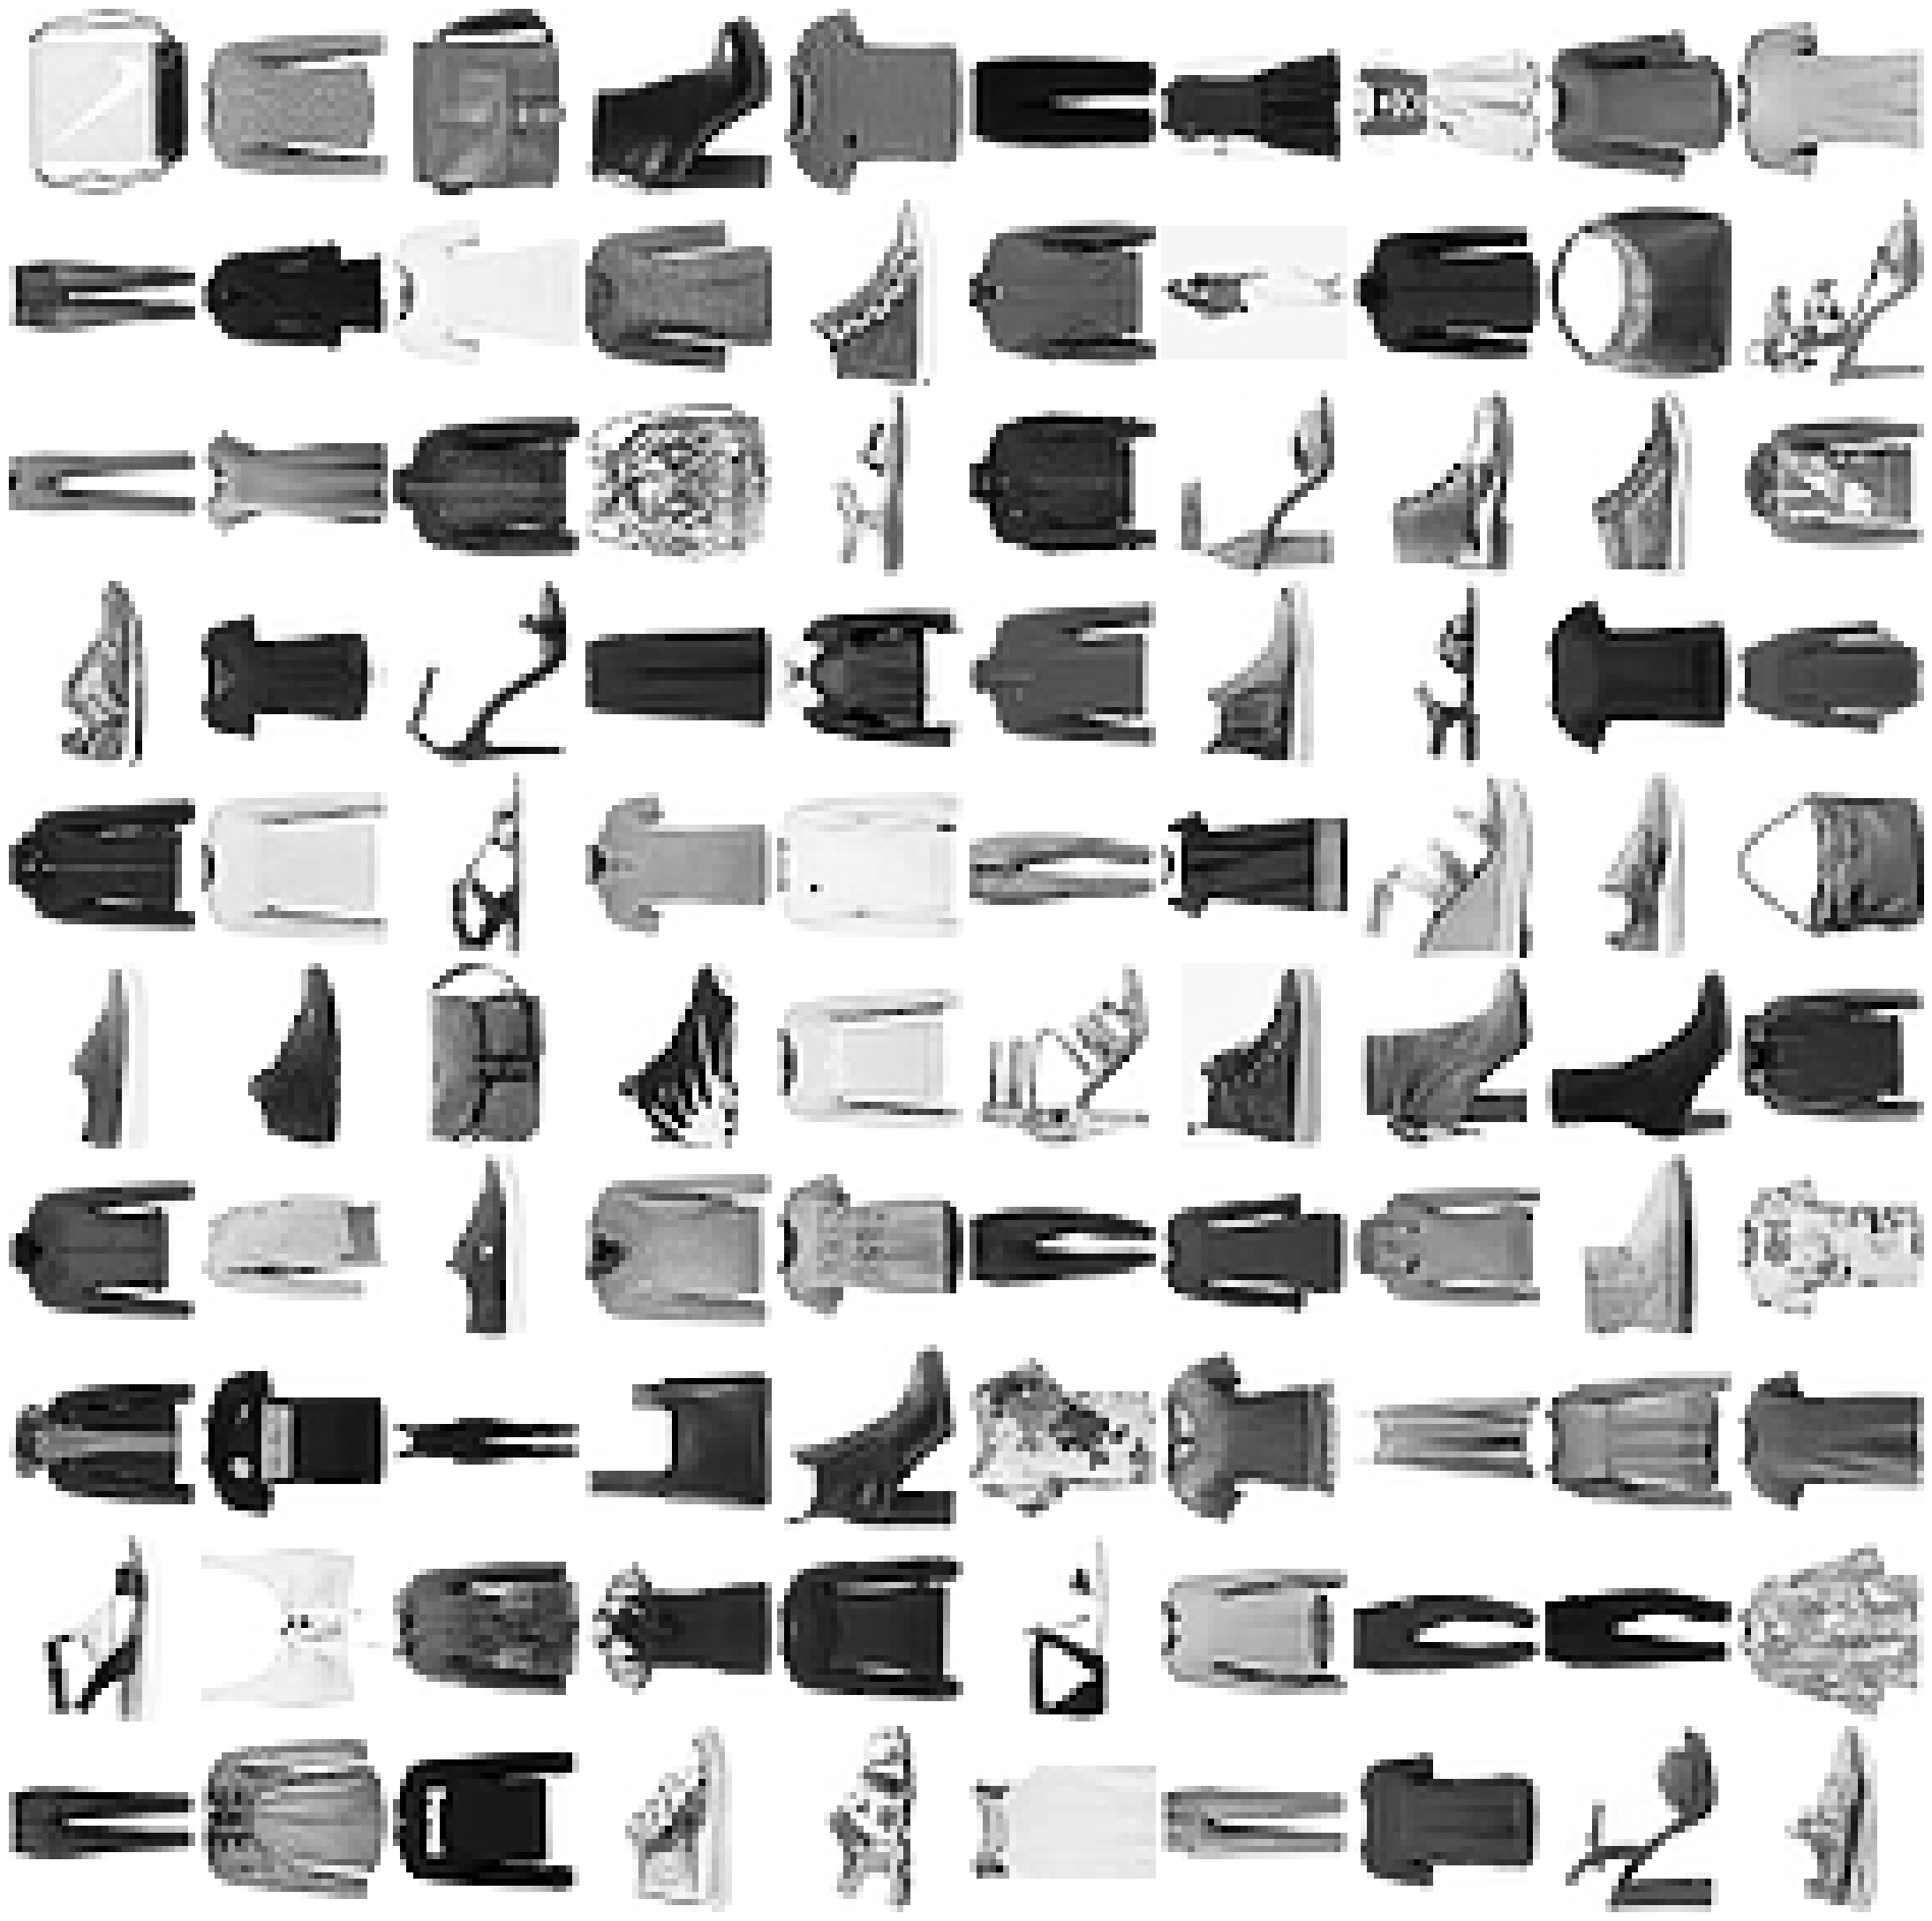

In [229]:
# Selecciona aleatoriamente 100 indices para mostrar
rand_indices = np.random.choice(m, 100, replace=False)

# Selecciona los puntos de datos correspondientes a los índices aleatorios
sel = X[rand_indices, :]

# Utiliza la función displayData para visualizar los puntos de datos seleccionados
displayData(sel)


In [230]:
# theta" generalmente se refiere a los parámetros del modelo de regresión
#valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# Crear una matriz X_t con una columna de unos y otra con valores escalares
# La matriz resultante tiene 5 filas y 2 columnas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F') / 10.0], axis=1)

# valores de testeo para las etiquetas
# Se crea un array y_t con las etiquetas de prueba (0 o 1) para cada fila de la matriz de entrada X_t.
y_t = np.array([1, 0, 1, 0, 1])

# valor de testeo para el parámetro de regularización
#controla el equilibrio entre ajustarse bien a los datos de entrenamiento y evitar el sobreajuste
lambda_t = 3


In [231]:
#La función sigmoide transforma cualquier valor real en el rango de 0 a 1 mediante la fórmula
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [232]:
def lrCostFunction(theta, X, y, lambda_):
    """Este cálculo de la función de costo incluye dos términos: el término de Entropía Cruzada Binaria
     y el término de penalización de la regularización lambda, este lo usa para evitar un sobreajuste."""
    m = y.size

    # Verificar si el tipo de datos de las etiquetas 'y' es booleano
    if y.dtype == bool:
    # Si 'y' es de tipo booleano, convertirlo a tipo entero (0 o 1)
     y = y.astype(int)

    # Inicializa el costo y el gradiente
    J = 0
    grad = np.zeros(theta.shape)

    # Calcula la hipótesis utilizando la función sigmoide
    #se utiliza comúnmente para tomar decisiones de clasificación.
    h = sigmoid(X.dot(theta.T))

    # Realiza el cálculo del costo regularizado
    # m representa el número de ejemplos de entrenamiento (tamaño de y).
    #n (no se muestra en el fragmento proporcionado) suele representar el número de características en cada ejemplo (número de columnas en X).

    temp = theta
    temp[0] = 0
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Calcula el gradiente de la función de costo regularizado
    #El gradiente se utilizará para ajustar los parámetros del modelo con el objetivo de minimizar la función de costo regularizada.
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    # Devuelve el costo y el gradiente
    return J, grad


In [233]:
# Calcula el costo (J) y el gradiente (grad) utilizando la función lrCostFunction
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

# Imprime el resultado del costo y compáralo con el valor esperado
print('Costo         : {:.6f}'.format(J))
print('Costo esperado: 2.534819')
print('-----------------------')

# Imprime los gradientes calculados y compáralos con los valores esperados
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]')


Costo         : 2.534819
Costo esperado: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [234]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Entrena num_labels clasificadores de regresión logística y devuelve
    cada uno de estos clasificadores en una matriz all_theta, donde la i-ésima
    fila de all_theta corresponde al clasificador para la etiqueta i.

    """
    # Obtener las dimensiones de la matriz de características X
    m, n = X.shape

    # Inicializa la matriz de parámetros para cada clasificador
    all_theta = np.zeros((num_labels, n + 1))

    # Se concatena una columna de unos al inicio de la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Itera sobre todas las etiquetas y entrena un clasificador para cada una
    for c in np.arange(num_labels):
        # Inicializa los parámetros theta para el clasificador actual
        initial_theta = np.zeros(n + 1)

        # Configuración de opciones para la optimización (método de gradiente conjugado)
        options = {'maxiter': 50}

        # Utiliza la función minimize de scipy para entrenar el clasificador actual
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        # Almacena los parámetros theta entrenados en la matriz all_theta
        all_theta[c] = res.x

    return all_theta


In [252]:
# Valor de regularización lambda
lambda_ = 0.00000001

# Entrena clasificadores de regresión logística utilizando la funcion one vs all
# y almacena los parámetros entrenados en la matriz all_theta
all_theta = oneVsAll(X, y, num_labels, lambda_)


<ipython-input-231-53cacd6811fc>:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-232-a1108b655336>:25: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-231-53cacd6811fc>:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-232-a1108b655336>:25: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))


In [253]:
# Imprime la forma (dimensiones) de la matriz all_theta
print(all_theta.shape)

# Imprime los parámetros theta entrenados para el clasificador asociado a la etiqueta 0
print(all_theta[0])


(9, 785)
[-1.57835122e-04 -2.90957792e-07  8.08949796e-05  3.61451955e-04
 -9.73585907e-05 -3.48151714e-04 -5.37767385e-04 -9.36087517e-04
 -9.67418850e-04 -7.89394568e-04 -1.07323065e-03 -2.99505857e-03
  2.33644168e-03 -1.18641031e-03 -3.70257054e-03 -3.14616722e-03
 -1.54775016e-03  1.81939397e-03  3.96340618e-03 -1.01767029e-03
  2.62918161e-04  1.69480404e-03 -1.42930692e-04 -1.08421239e-03
 -6.29047457e-04 -1.81174043e-04 -2.66050034e-04  1.10162208e-05
  3.61893555e-04  2.13914807e-05  3.64906486e-05  5.81919092e-04
 -2.76687466e-04 -1.45221759e-03 -1.93975457e-03 -3.56270867e-03
 -2.32733698e-03 -1.58938952e-03 -1.68499036e-03 -1.71462261e-03
  2.83030534e-03 -2.26476472e-03 -3.98877623e-04 -6.44924623e-04
 -7.42898007e-04  1.00809074e-04  2.42049147e-03 -2.59876913e-04
 -2.10065024e-03  3.08858979e-03 -2.32914936e-04 -6.03040087e-04
 -5.61507505e-05  2.78318926e-04 -7.60409908e-05  1.32368506e-04
  6.18499864e-04 -8.38460628e-06 -2.44446766e-04 -3.45233696e-04
 -3.51291376e-04

In [254]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    """
    # Obtiene el número de ejemplos de entrenamiento (filas en X)
    m = X.shape[0];
    # Obtiene el número de clases en el problema de clasificación (filas en all_theta)
    num_labels = all_theta.shape[0]
    # Inicializa un vector de ceros para almacenar las predicciones
    p = np.zeros(m)

    # Agrega una columna de unos al inicio de la matriz X para representar el término de intercepción
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    # Calcula las probabilidades de pertenecer a cada clase utilizando la función sigmoide
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(10000, 784)
Precision del conjunto de entrenamiento: 78.76%
(16, 785)
[0 4 0 4 6 1 0 4 5 4 6 2 1 8 6 5] [0 4 0 4 3 1 0 4 5 4 6 2 1 8 6 5]


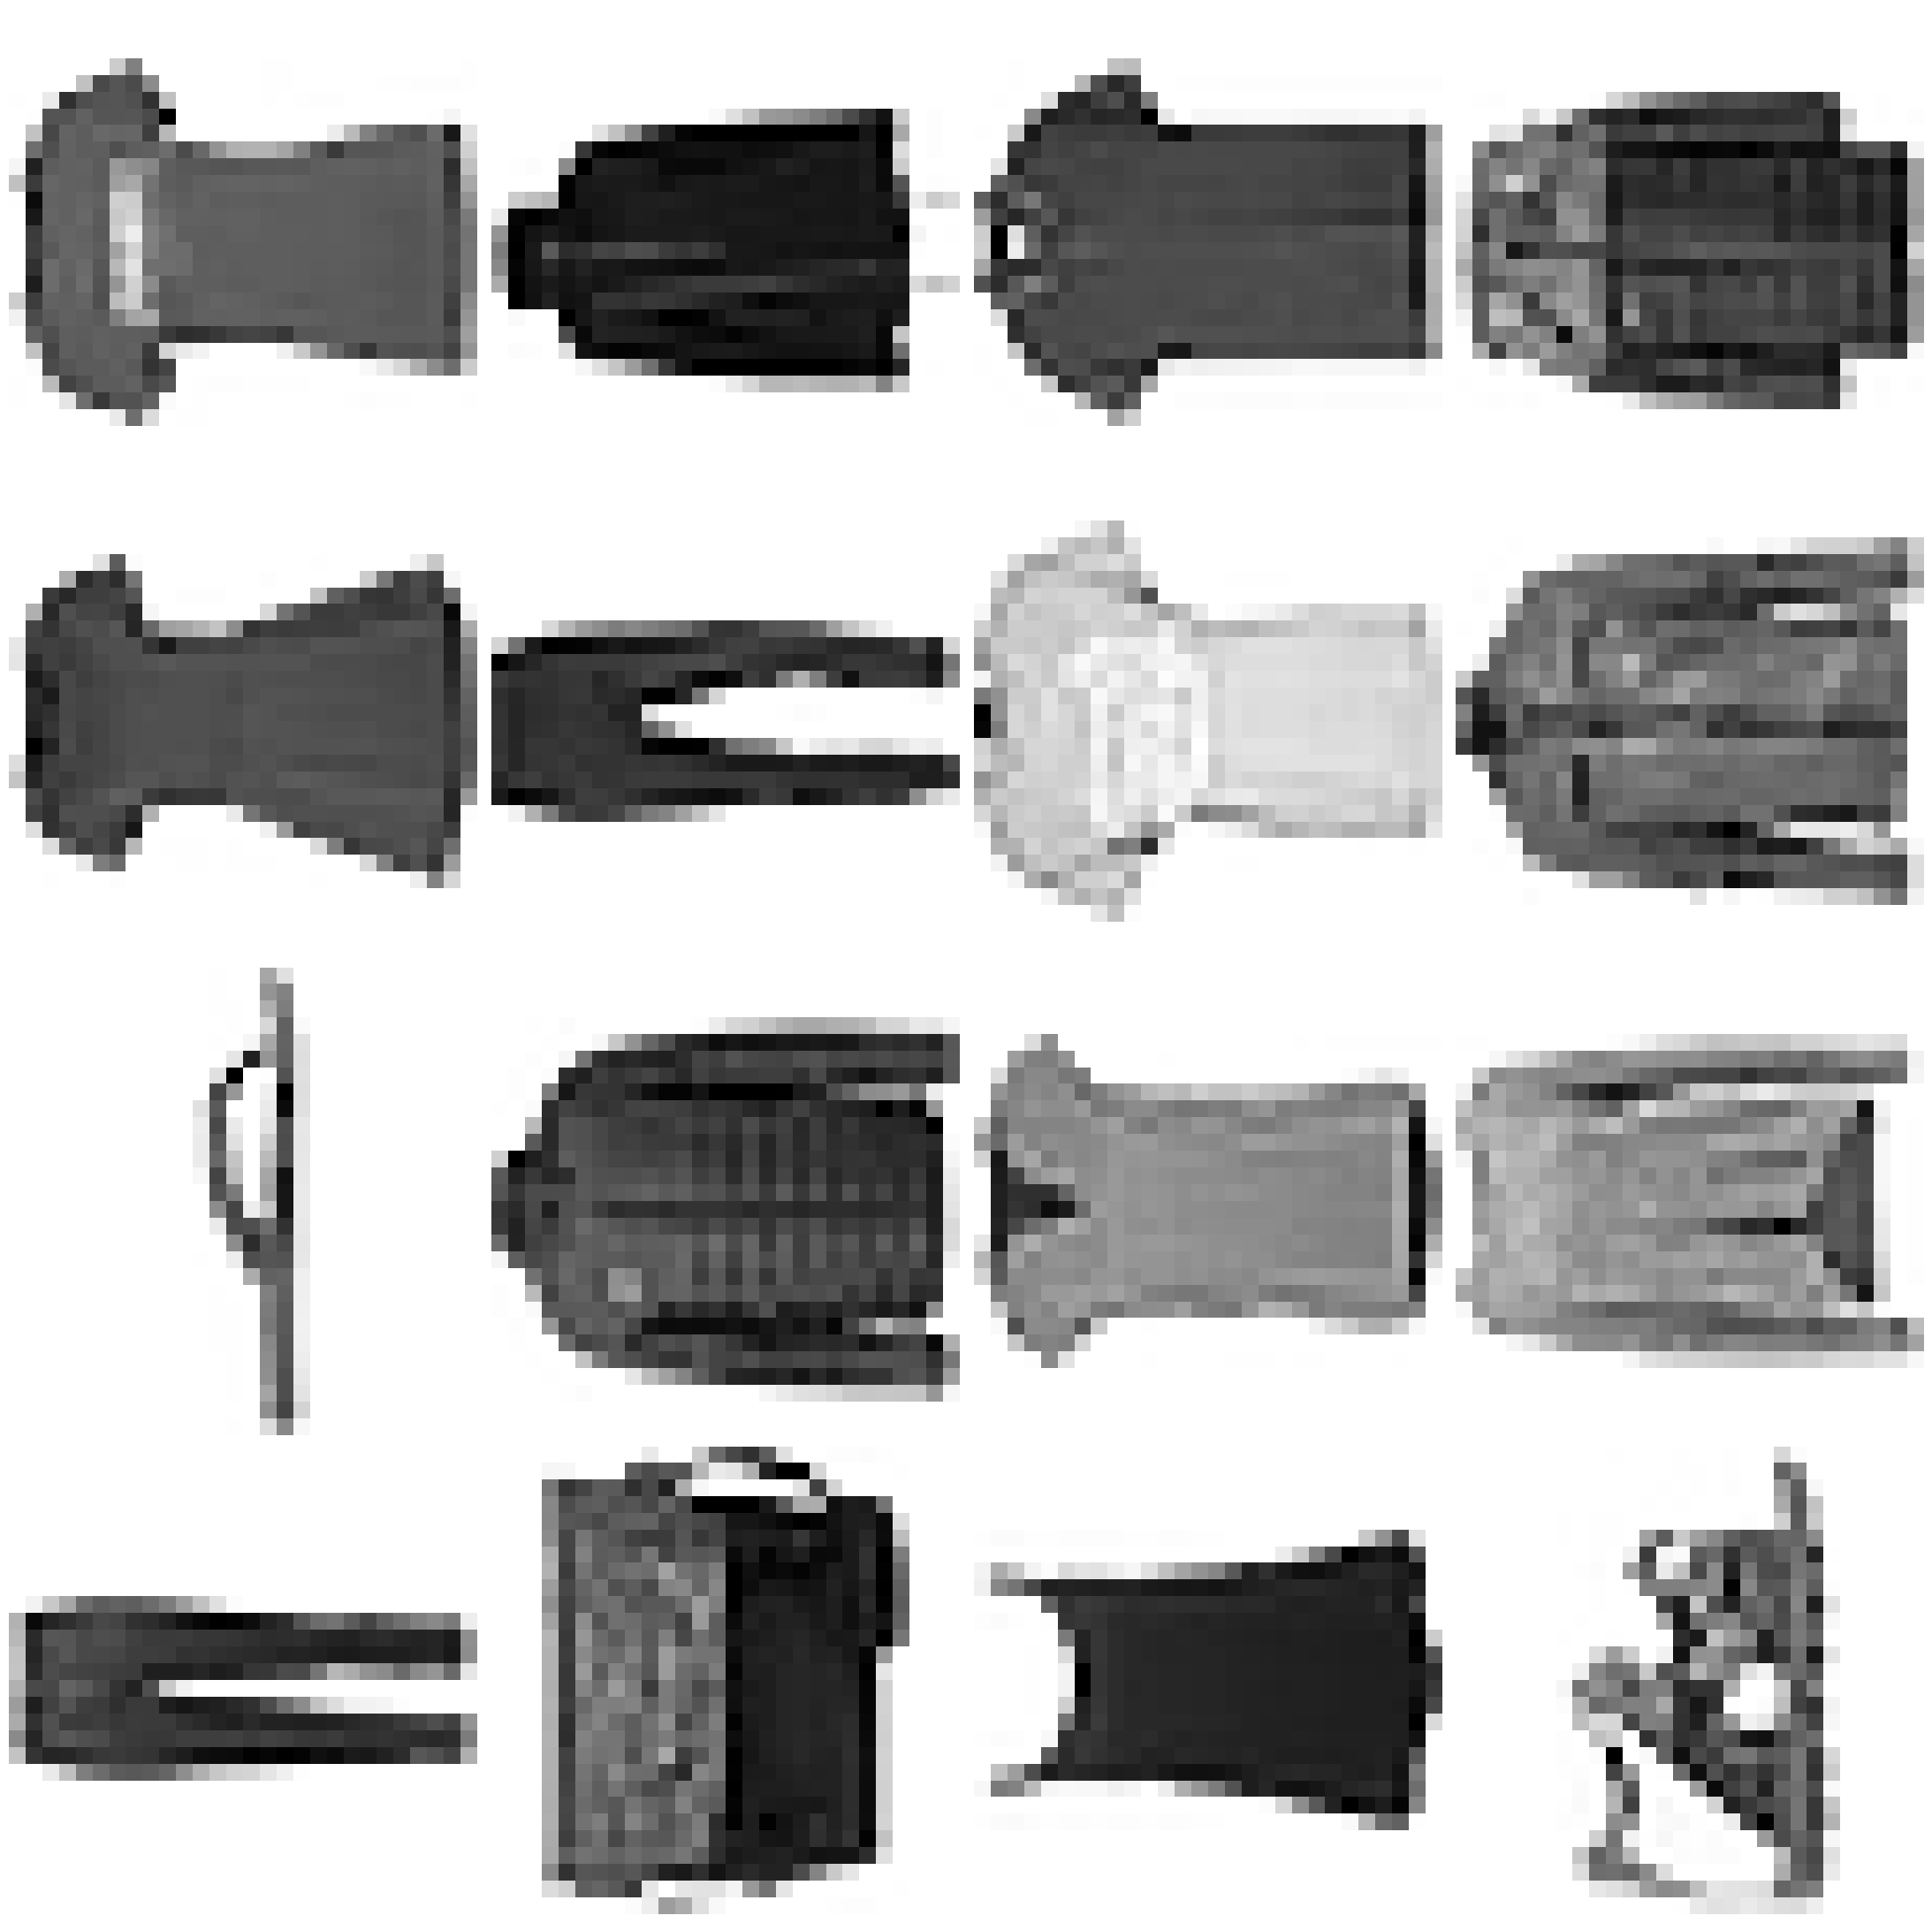

In [255]:
# Imprime las dimensiones de la matriz X antes de la modificación
print(X.shape)

# Realiza predicciones utilizando el modelo one-vs-all
pred = predictOneVsAll(all_theta, X)

# Calcula la precisión del conjunto de entrenamiento y la imprime
precision = np.mean(pred == y) * 100
print('Precision del conjunto de entrenamiento: {:.2f}%'.format(precision))

# Selecciona aleatoriamente 12 ejemplos de prueba sin reemplazo
rand_indices = np.random.choice(m, 16, replace=False)

# Crea una matriz de prueba con los ejemplos seleccionados
XPrueba = X[rand_indices, :]
XPruebaV = XPrueba.copy()

# Agrega una columna de unos al inicio de la matriz de prueba
XPrueba = np.concatenate([np.ones((16, 1)), XPrueba], axis=1)

# Imprime las dimensiones de la matriz de prueba después de la modificación
print(XPrueba.shape)

# Realiza predicciones en los ejemplos de prueba y las compara con las etiquetas reales
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis=1)
print(p, y[rand_indices])

# Muestra visualmente los ejemplos de prueba
displayData(XPruebaV)
